In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
#import the data and review features for incorrect datatypes or any additional cleanup
auto_df = pd.read_csv('../exports/subset_auto_data.csv')
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95226 entries, 0 to 95225
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    95226 non-null  int64  
 1   Date_start_contract   95226 non-null  object 
 2   Date_last_renewal     95226 non-null  object 
 3   Date_next_renewal     95226 non-null  object 
 4   Date_birth            95226 non-null  object 
 5   Date_driving_licence  95226 non-null  object 
 6   Distribution_channel  95226 non-null  int64  
 7   Seniority             95226 non-null  int64  
 8   Policies_in_force     95226 non-null  int64  
 9   Max_policies          95226 non-null  int64  
 10  Max_products          95226 non-null  int64  
 11  Lapse                 95226 non-null  int64  
 12  Payment               95226 non-null  int64  
 13  Premium               95226 non-null  float64
 14  Cost_claims_year      95226 non-null  float64
 15  N_claims_year      

In [4]:
#remove date columns as we have already pulled the relevant information from them (creating an age column based on the dates)
auto_df.drop(columns=['Date_start_contract', 'Date_last_renewal', 'Date_next_renewal', 'Date_birth', 'Date_driving_licence'], inplace=True)
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95226 entries, 0 to 95225
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    95226 non-null  int64  
 1   Distribution_channel  95226 non-null  int64  
 2   Seniority             95226 non-null  int64  
 3   Policies_in_force     95226 non-null  int64  
 4   Max_policies          95226 non-null  int64  
 5   Max_products          95226 non-null  int64  
 6   Lapse                 95226 non-null  int64  
 7   Payment               95226 non-null  int64  
 8   Premium               95226 non-null  float64
 9   Cost_claims_year      95226 non-null  float64
 10  N_claims_year         95226 non-null  int64  
 11  N_claims_history      95226 non-null  int64  
 12  R_Claims_history      95226 non-null  float64
 13  Type_risk             95226 non-null  int64  
 14  Area                  95226 non-null  int64  
 15  Second_driver      

In [5]:
#encode the Type of fuel which is a discrete categorical column to binary values of 0 or 1
mapping = {'D': 0, 'P' : 1}
auto_df['Type_fuel'] = auto_df['Type_fuel'].map(mapping)
auto_df['Type_fuel'].value_counts()

Type_fuel
0    63600
1    31626
Name: count, dtype: int64

In [6]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95226 entries, 0 to 95225
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    95226 non-null  int64  
 1   Distribution_channel  95226 non-null  int64  
 2   Seniority             95226 non-null  int64  
 3   Policies_in_force     95226 non-null  int64  
 4   Max_policies          95226 non-null  int64  
 5   Max_products          95226 non-null  int64  
 6   Lapse                 95226 non-null  int64  
 7   Payment               95226 non-null  int64  
 8   Premium               95226 non-null  float64
 9   Cost_claims_year      95226 non-null  float64
 10  N_claims_year         95226 non-null  int64  
 11  N_claims_history      95226 non-null  int64  
 12  R_Claims_history      95226 non-null  float64
 13  Type_risk             95226 non-null  int64  
 14  Area                  95226 non-null  int64  
 15  Second_driver      

In [7]:
auto_df.head()

,ID,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,Cost_claims_year,...,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Age
0,3,0,15,1,2,1,0,0,380.20,0.0,...,0,2013,85,1229,16030.0,5,1,3.999,1105,40.700890
1,3,0,15,1,2,1,0,0,393.50,0.0,...,0,2013,85,1229,16030.0,5,1,3.999,1105,41.702943
2,3,0,15,1,2,1,0,0,393.50,0.0,...,0,2013,85,1229,16030.0,5,1,3.999,1105,42.702259
3,3,0,15,1,2,1,0,0,395.47,0.0,...,0,2013,85,1229,16030.0,5,1,3.999,1105,43.701574
4,6,0,13,1,2,2,0,0,250.52,0.0,...,0,2006,87,1598,9927.0,4,1,4.250,1055,49.604381


In [8]:
auto_df.corr()

,ID,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,Cost_claims_year,...,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Age
ID,1.000000,-0.141352,-0.131236,-0.041383,-0.072223,-0.062136,0.026554,0.036552,0.018593,0.010053,...,-0.050622,-0.002373,0.032966,0.039695,0.027341,0.004226,-0.038285,0.041228,0.034695,-0.211144
Distribution_channel,-0.141352,1.000000,-0.154123,-0.034913,-0.066688,-0.035902,0.033192,0.044633,0.050479,0.005359,...,0.039099,0.021067,0.005357,0.017564,0.005371,0.009170,-0.030005,0.025189,0.018951,0.014236
Seniority,-0.131236,-0.154123,1.000000,0.025876,0.241914,0.221048,-0.064314,-0.171295,-0.070993,-0.022670,...,-0.078553,-0.103561,-0.061969,-0.025191,-0.058219,-0.043236,0.054761,-0.048144,-0.044039,0.189730
Policies_in_force,-0.041383,-0.034913,0.025876,1.000000,0.775061,0.057890,0.197834,0.050518,-0.050662,0.018259,...,0.070416,-0.057969,0.036666,0.075918,0.082588,-0.022386,-0.029834,0.079602,0.084252,0.028558
Max_policies,-0.072223,-0.066688,0.241914,0.775061,1.000000,0.262791,0.176415,0.024031,-0.037896,0.011065,...,0.039764,-0.058188,0.047970,0.087367,0.087161,-0.026240,-0.031938,0.092189,0.095449,0.077750
Max_products,-0.062136,-0.035902,0.221048,0.057890,0.262791,1.000000,0.015709,-0.017660,-0.012741,0.000065,...,-0.003113,-0.017774,0.015312,0.019306,0.017073,0.000332,0.006552,0.015271,0.014075,0.082830
Lapse,0.026554,0.033192,-0.064314,0.197834,0.176415,0.015709,1.000000,0.073990,0.065049,-0.010191,...,-0.015062,-0.114471,-0.003849,0.051477,-0.003142,-0.046332,-0.007886,0.016269,0.010764,-0.024334
Payment,0.036552,0.044633,-0.171295,0.050518,0.024031,-0.017660,0.073990,1.000000,0.187958,0.028597,...,0.029530,0.002497,0.036117,0.027865,0.021526,-0.002354,-0.021840,0.037889,0.030398,-0.129698
Premium,0.018593,0.050479,-0.070993,-0.050662,-0.037896,-0.012741,0.065049,0.187958,1.000000,0.047511,...,0.107512,0.287014,0.282626,0.123152,0.340708,0.030763,-0.073945,0.195998,0.216801,-0.101747
Cost_claims_year,0.010053,0.005359,-0.022670,0.018259,0.011065,0.000065,-0.010191,0.028597,0.047511,1.000000,...,0.010297,0.012815,0.019439,0.013736,0.022459,-0.006611,-0.009033,0.018452,0.018193,-0.021823


In [9]:
#Run describe to see the distribution of data to understand if scaling is needed
auto_df.describe()

,ID,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,Cost_claims_year,...,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Age
count,95226.000000,95226.000000,95226.000000,95226.000000,95226.000000,95226.000000,95226.000000,95226.000000,95226.000000,95226.000000,...,95226.000000,95226.000000,95226.000000,95226.000000,95226.000000,95226.000000,95226.000000,95226.000000,95226.000000,95226.000000
mean,26561.150862,0.554218,6.655336,1.419654,1.795518,1.048128,0.219908,0.347384,333.527729,165.532681,...,0.136265,2005.195587,99.341524,1719.102724,19551.297720,4.462720,0.332115,4.252007,1266.898137,47.177423
std,15350.049873,0.661895,6.212029,0.879651,1.108000,0.231117,0.460368,0.476142,134.341370,1549.798278,...,0.343072,5.678827,30.091550,409.410671,8219.591153,0.869386,0.470975,0.393220,264.044713,12.790737
min,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.400000,0.000000,...,0.000000,1953.000000,12.000000,125.000000,270.460000,0.000000,0.000000,1.978000,137.000000,18.075291
25%,13337.250000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,254.810000,0.000000,...,0.000000,2002.000000,75.000000,1422.000000,14270.080000,4.000000,0.000000,3.999000,1089.000000,37.108830
50%,26326.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,301.650000,0.000000,...,0.000000,2005.000000,98.000000,1665.000000,18330.870000,5.000000,0.000000,4.230000,1239.000000,46.600958
75%,40000.750000,1.000000,9.000000,2.000000,2.000000,1.000000,0.000000,1.000000,370.710000,0.000000,...,0.000000,2008.000000,112.000000,1956.000000,23000.000000,5.000000,1.000000,4.443000,1399.000000,56.410678
max,53502.000000,3.000000,40.000000,17.000000,17.000000,4.000000,7.000000,1.000000,2993.340000,260853.240000,...,1.000000,2018.000000,580.000000,6788.000000,220675.800000,6.000000,1.000000,8.218000,5455.000000,98.529774


In [10]:
#realized I had an errant value in Distribution channel
#subset df to exclude category of 3 which was used to represent missing values
auto_df = auto_df[auto_df['Distribution_channel'] != 3]
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92194 entries, 0 to 95225
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    92194 non-null  int64  
 1   Distribution_channel  92194 non-null  int64  
 2   Seniority             92194 non-null  int64  
 3   Policies_in_force     92194 non-null  int64  
 4   Max_policies          92194 non-null  int64  
 5   Max_products          92194 non-null  int64  
 6   Lapse                 92194 non-null  int64  
 7   Payment               92194 non-null  int64  
 8   Premium               92194 non-null  float64
 9   Cost_claims_year      92194 non-null  float64
 10  N_claims_year         92194 non-null  int64  
 11  N_claims_history      92194 non-null  int64  
 12  R_Claims_history      92194 non-null  float64
 13  Type_risk             92194 non-null  int64  
 14  Area                  92194 non-null  int64  
 15  Second_driver         92

In [11]:
#run describe again to confirm things are looking as they should.
auto_df.describe()

,ID,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,Cost_claims_year,...,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Age
count,92194.000000,92194.000000,92194.000000,92194.000000,92194.000000,92194.000000,92194.000000,92194.000000,92194.000000,92194.000000,...,92194.000000,92194.000000,92194.000000,92194.000000,92194.000000,92194.000000,92194.000000,92194.000000,92194.000000,92194.000000
mean,27046.920429,0.473784,6.577673,1.417923,1.789173,1.047335,0.220882,0.349188,333.862704,167.190353,...,0.136224,2005.202920,99.406057,1719.937881,19570.460070,4.462069,0.331052,4.253175,1267.699384,47.054487
std,15303.454875,0.499315,6.144852,0.877810,1.103817,0.229065,0.460588,0.476716,134.280356,1572.591026,...,0.343028,5.666898,30.059321,408.547611,8203.110028,0.870156,0.470594,0.393921,263.699429,12.764341
min,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.530000,0.000000,...,0.000000,1953.000000,12.000000,125.000000,270.460000,0.000000,0.000000,1.978000,137.000000,18.075291
25%,13846.500000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,255.100000,0.000000,...,0.000000,2002.000000,75.000000,1422.000000,14291.000000,4.000000,0.000000,3.999000,1089.000000,37.021218
50%,27237.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,302.090000,0.000000,...,0.000000,2005.000000,98.000000,1685.000000,18340.000000,5.000000,0.000000,4.235000,1240.000000,46.428474
75%,40446.000000,1.000000,9.000000,2.000000,2.000000,1.000000,0.000000,1.000000,371.137500,0.000000,...,0.000000,2008.000000,112.000000,1968.000000,23030.000000,5.000000,1.000000,4.448000,1400.000000,56.243669
max,53502.000000,1.000000,40.000000,17.000000,17.000000,4.000000,7.000000,1.000000,2993.340000,260853.240000,...,1.000000,2018.000000,580.000000,6788.000000,220675.800000,6.000000,1.000000,8.218000,5455.000000,98.529774


In [12]:
auto_df.corr()

,ID,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,Cost_claims_year,...,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Age
ID,1.000000,-0.033531,-0.126862,-0.040957,-0.070198,-0.062530,0.025201,0.033654,0.016107,0.009140,...,-0.052047,-0.003661,0.032205,0.039325,0.026323,0.004488,-0.036958,0.039994,0.033512,-0.208661
Distribution_channel,-0.033531,1.000000,-0.277277,-0.057881,-0.120740,-0.067105,0.056120,0.080178,0.081769,0.012565,...,0.052927,0.035453,0.018204,0.034441,0.019187,0.008758,-0.052548,0.049425,0.041355,-0.029195
Seniority,-0.126862,-0.277277,1.000000,0.028549,0.242568,0.221272,-0.063472,-0.169007,-0.068270,-0.022365,...,-0.078995,-0.100989,-0.060848,-0.026061,-0.057822,-0.042399,0.052757,-0.046775,-0.042699,0.185862
Policies_in_force,-0.040957,-0.057881,0.028549,1.000000,0.776854,0.059348,0.195802,0.051240,-0.049685,0.018438,...,0.069966,-0.057252,0.037579,0.076142,0.082995,-0.022842,-0.029787,0.080543,0.085175,0.030552
Max_policies,-0.070198,-0.120740,0.242568,0.776854,1.000000,0.262115,0.174654,0.025461,-0.036113,0.011173,...,0.039412,-0.056432,0.048851,0.087099,0.088314,-0.027021,-0.032624,0.093487,0.096928,0.077216
Max_products,-0.062530,-0.067105,0.221272,0.059348,0.262115,1.000000,0.015531,-0.017964,-0.011844,0.000037,...,-0.002965,-0.016048,0.015123,0.019127,0.017488,-0.000733,0.006067,0.014816,0.014882,0.081351
Lapse,0.025201,0.056120,-0.063472,0.195802,0.174654,0.015531,1.000000,0.073712,0.065578,-0.010230,...,-0.016069,-0.115209,-0.002936,0.052801,-0.002427,-0.047215,-0.008534,0.016238,0.010911,-0.022599
Payment,0.033654,0.080178,-0.169007,0.051240,0.025461,-0.017964,0.073712,1.000000,0.188103,0.028555,...,0.029023,0.001025,0.034239,0.027628,0.020595,-0.002207,-0.020962,0.036649,0.029065,-0.126869
Premium,0.016107,0.081769,-0.068270,-0.049685,-0.036113,-0.011844,0.065578,0.188103,1.000000,0.046909,...,0.107783,0.285730,0.281564,0.123425,0.340265,0.028701,-0.072775,0.195856,0.216731,-0.101130
Cost_claims_year,0.009140,0.012565,-0.022365,0.018438,0.011173,0.000037,-0.010230,0.028555,0.046909,1.000000,...,0.009817,0.012327,0.019349,0.013687,0.022309,-0.006531,-0.008789,0.018327,0.018235,-0.021723


In [12]:
#since you are just looking to predict passenger cars, lets subset the data by that risk type

In [13]:
auto_df['Type_risk'].value_counts()

Type_risk
3    79570
2    12601
4       21
1        2
Name: count, dtype: int64

In [40]:
auto_df_sub = auto_df[auto_df['Type_risk'] == 3]
auto_df_sub.drop(columns=['Type_risk'], inplace=True)
print(auto_df_sub['N_doors'].value_counts())
auto_df_sub.info()

N_doors
5    53758
3    13136
4    10863
2     1743
6       70
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 79570 entries, 0 to 95225
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    79570 non-null  int64  
 1   Distribution_channel  79570 non-null  int64  
 2   Seniority             79570 non-null  int64  
 3   Policies_in_force     79570 non-null  int64  
 4   Max_policies          79570 non-null  int64  
 5   Max_products          79570 non-null  int64  
 6   Lapse                 79570 non-null  int64  
 7   Payment               79570 non-null  int64  
 8   Premium               79570 non-null  float64
 9   Cost_claims_year      79570 non-null  float64
 10  N_claims_year         79570 non-null  int64  
 11  N_claims_history      79570 non-null  int64  
 12  R_Claims_history      79570 non-null  float64
 13  Area                  79570 non-null 

/var/folders/k7/_jdxw9bx3_7cybsnkxz0pr200000gn/T/ipykernel_17099/3806221671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df_sub.drop(columns=['Type_risk'], inplace=True)


In [41]:
# Additionally, you will only be looking at cars with 4 or 5 doors (which would be either sedan or hatchbacks)
# auto_df_sub = auto_df_sub[(auto_df_sub['N_doors'] == 4) | (auto_df_sub['N_doors'] == 5)]
auto_df_sub['N_doors'].value_counts()

N_doors
5    53758
3    13136
4    10863
2     1743
6       70
Name: count, dtype: int64

In [42]:
auto_df_sub.corr()

,ID,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,Cost_claims_year,...,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Age
ID,1.000000,-0.035886,-0.125342,-0.044517,-0.076866,-0.066327,0.027091,0.032031,0.011051,0.008395,...,-0.057564,-0.008373,0.033022,0.045939,0.025105,0.004284,-0.038261,0.048191,0.035968,-0.206768
Distribution_channel,-0.035886,1.000000,-0.278012,-0.056694,-0.123157,-0.063662,0.058775,0.082222,0.075718,0.012469,...,0.061481,0.034569,0.014422,0.013798,0.009222,0.013169,-0.042793,0.014472,0.009089,-0.030258
Seniority,-0.125342,-0.278012,1.000000,0.028359,0.250171,0.218247,-0.066764,-0.170105,-0.067483,-0.022631,...,-0.080801,-0.099430,-0.062525,-0.037359,-0.058184,-0.039810,0.059661,-0.058168,-0.055802,0.183728
Policies_in_force,-0.044517,-0.056694,0.028359,1.000000,0.774789,0.057615,0.180339,0.048536,-0.050049,0.016428,...,0.079068,-0.061282,0.029127,0.063426,0.085273,-0.018853,-0.032504,0.061480,0.074861,0.042925
Max_policies,-0.076866,-0.123157,0.250171,0.774789,1.000000,0.265372,0.161171,0.021078,-0.036594,0.009599,...,0.046931,-0.058701,0.044864,0.071214,0.091346,-0.020981,-0.029275,0.070337,0.084550,0.089103
Max_products,-0.066327,-0.063662,0.218247,0.057615,0.265372,1.000000,0.014079,-0.017149,-0.009549,-0.000129,...,-0.003724,-0.015934,0.017518,0.019648,0.020395,-0.001940,0.009463,0.020429,0.017217,0.081607
Lapse,0.027091,0.058775,-0.066764,0.180339,0.161171,0.014079,1.000000,0.069399,0.062915,-0.010036,...,-0.016974,-0.120980,-0.004433,0.051032,-0.000976,-0.047075,-0.007999,0.010138,0.007330,-0.020803
Payment,0.032031,0.082222,-0.170105,0.048536,0.021078,-0.017149,0.069399,1.000000,0.183846,0.028884,...,0.027230,0.004111,0.032484,0.033150,0.020165,-0.007841,-0.028545,0.046497,0.034809,-0.124647
Premium,0.011051,0.075718,-0.067483,-0.050049,-0.036594,-0.009549,0.062915,0.183846,1.000000,0.045480,...,0.112897,0.292045,0.279510,0.131404,0.335963,0.032097,-0.080152,0.198765,0.237610,-0.098125
Cost_claims_year,0.008395,0.012469,-0.022631,0.016428,0.009599,-0.000129,-0.010036,0.028884,0.045480,1.000000,...,0.009982,0.011418,0.018856,0.015165,0.020822,-0.006401,-0.008754,0.017942,0.019241,-0.020742


Text(0, 0.5, 'Premium')

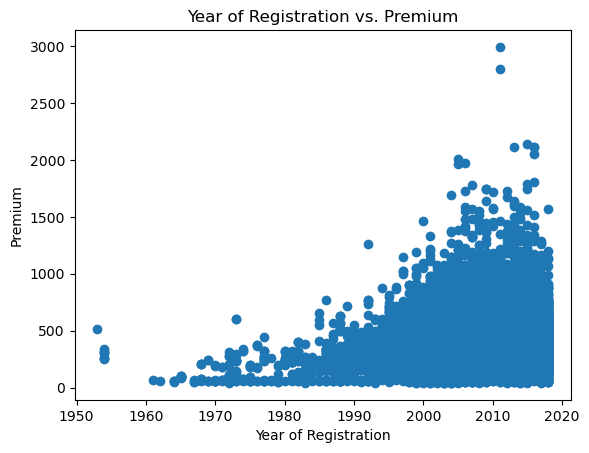

In [64]:
plt.scatter(auto_df_sub['Year_matriculation'], auto_df_sub['Premium'])
plt.title('Year of Registration vs. Premium')
plt.xlabel('Year of Registration')
plt.ylabel('Premium')

In [43]:
auto_df_sub.Premium.describe()

count    79570.000000
mean       334.643764
std        137.113415
min         40.710000
25%        254.350000
50%        300.810000
75%        371.840000
max       2993.340000
Name: Premium, dtype: float64

In [44]:
test = auto_df_sub['Premium'].quantile([.05,.95])
print(test)
auto_df_sub[auto_df_sub['Premium'] > 498.80].shape

0.05    201.680
0.95    591.222
Name: Premium, dtype: float64


(7625, 24)

In [45]:
cut_auto_df_sub = auto_df_sub[(auto_df_sub['Premium'] <= test[.95]) & (auto_df_sub['Premium'] >= test[.05])]
print(cut_auto_df_sub.shape)
cut_auto_df_sub.corr()


(71614, 24)


,ID,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,Cost_claims_year,...,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Age
ID,1.000000,-0.036734,-0.124816,-0.040571,-0.072692,-0.063527,0.029249,0.032686,0.032003,0.010005,...,-0.057493,-0.012360,0.035395,0.049742,0.029208,0.006026,-0.041152,0.050229,0.037522,-0.206929
Distribution_channel,-0.036734,1.000000,-0.279429,-0.055846,-0.126553,-0.066354,0.056745,0.080408,0.087045,0.012262,...,0.057782,0.030089,0.012214,0.012702,0.004616,0.012208,-0.045104,0.013271,0.006666,-0.027089
Seniority,-0.124816,-0.279429,1.000000,0.026665,0.255538,0.216062,-0.068293,-0.172136,-0.092158,-0.025381,...,-0.078046,-0.096334,-0.065016,-0.040482,-0.064858,-0.041254,0.060593,-0.060131,-0.060147,0.176906
Policies_in_force,-0.040571,-0.055846,0.026665,1.000000,0.762125,0.057691,0.185891,0.064815,-0.007621,0.021435,...,0.088262,-0.048535,0.036770,0.071813,0.100544,-0.016699,-0.032864,0.068368,0.085511,0.039860
Max_policies,-0.072692,-0.126553,0.255538,0.762125,1.000000,0.269846,0.161251,0.029596,-0.015152,0.013737,...,0.052252,-0.043293,0.053995,0.078320,0.106167,-0.017137,-0.030212,0.076390,0.093830,0.086415
Max_products,-0.063527,-0.066354,0.216062,0.057691,0.269846,1.000000,0.014504,-0.017097,-0.024788,-0.002992,...,-0.005225,-0.019269,0.018328,0.020440,0.019724,-0.005940,0.009897,0.020303,0.016463,0.080425
Lapse,0.029249,0.056745,-0.068293,0.185891,0.161251,0.014504,1.000000,0.068389,0.069766,-0.009622,...,-0.020427,-0.116910,-0.005641,0.052062,-0.002772,-0.040768,-0.008222,0.010733,0.007903,-0.022427
Payment,0.032686,0.080408,-0.172136,0.064815,0.029596,-0.017097,0.068389,1.000000,0.215201,0.031259,...,0.020846,-0.011082,0.029999,0.031657,0.018052,-0.011571,-0.022875,0.041294,0.027610,-0.124546
Premium,0.032003,0.087045,-0.092158,-0.007621,-0.015152,-0.024788,0.069766,0.215201,1.000000,0.034069,...,0.129849,0.247458,0.218406,0.095993,0.259037,0.028543,-0.081639,0.169706,0.195683,-0.119150
Cost_claims_year,0.010005,0.012262,-0.025381,0.021435,0.013737,-0.002992,-0.009622,0.031259,0.034069,1.000000,...,0.011039,0.005922,0.010940,0.011487,0.013984,-0.002056,-0.011846,0.014707,0.016148,-0.018904


In [46]:
cut_auto_df_sub.describe()

,ID,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Payment,Premium,Cost_claims_year,...,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight,Age
count,71614.000000,71614.000000,71614.000000,71614.000000,71614.000000,71614.000000,71614.000000,71614.000000,71614.000000,71614.000000,...,71614.000000,71614.000000,71614.000000,71614.000000,71614.00000,71614.000000,71614.000000,71614.000000,71614.000000,71614.000000
mean,27131.265968,0.466529,6.551373,1.372972,1.739185,1.046290,0.222024,0.359343,320.854008,153.831312,...,0.145921,2005.173653,99.625199,1675.297777,19233.61285,4.467716,0.373405,4.191138,1226.656729,46.645040
std,15261.974981,0.498882,6.143475,0.810454,1.038239,0.225066,0.453404,0.479811,83.889722,1378.135144,...,0.353030,5.356695,28.897698,373.682703,7646.59400,0.840571,0.483712,0.309751,218.797050,12.754334
min,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,201.680000,0.000000,...,0.000000,1953.000000,20.000000,400.000000,270.46000,2.000000,0.000000,1.978000,349.000000,18.110883
25%,14052.250000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,258.790000,0.000000,...,0.000000,2002.000000,75.000000,1398.000000,14060.00000,4.000000,0.000000,3.962000,1072.000000,36.487337
50%,27392.500000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,300.810000,0.000000,...,0.000000,2005.000000,100.000000,1598.000000,18070.00000,5.000000,0.000000,4.204000,1205.000000,45.905544
75%,40481.750000,1.000000,8.000000,2.000000,2.000000,1.000000,0.000000,1.000000,361.967500,0.000000,...,0.000000,2008.000000,112.000000,1896.000000,22595.00000,5.000000,1.000000,4.394000,1355.000000,55.816564
max,53502.000000,1.000000,40.000000,17.000000,17.000000,4.000000,5.000000,1.000000,591.200000,236285.180000,...,1.000000,2018.000000,580.000000,5987.000000,131645.69000,6.000000,1.000000,5.260000,2643.000000,98.529774


In [47]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [48]:
#create the X and Y variables for your training and testing
X = auto_df_sub.drop(columns=['Premium'])
X = sm.add_constant(X)
y = auto_df_sub['Premium']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [49]:
#run an OLS model without scaling the data to see what the initial prediction is with all features
model1 = sm.OLS(y_train, X_train)

model1_res = model1.fit()

model1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     889.4
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:51:27   Log-Likelihood:            -3.7002e+05
No. Observations:               59677   AIC:                         7.401e+05
Df Residuals:                   59653   BIC:                         7.403e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -9043.4213    212.207    -42.616      0.000   -9459.348   -8627.494
ID                   -3.619e-06   3.32e-05     -0.109      0.913   -6.87e-05    6.15e-05
Distribution_channel    10.2613      1.040      9.867      0.000       8.223      12.300
Seniority                0.3551      0.103      3.438      0.001       0.153       0.558
Policies_in_force      -12.6834      0.978    -12.966      0.000     -14.601     -10.766
Max_policies            -5.9510      0.848     -7.016      0.000      -7.613      -4.289
Max_products            -5.6156      2.319     -2.421      0.015     -10.162      -1.069
Lapse                   25.6673      1.131     22.701      0.000      23.451      27.883
Payment                 45.0799      1.057     42.655      0.000      43.008      47.151
Cost_claims_year         0.0013      0.000      4.840      0.000       0.001       0.002
N_claims_year           -2.0318      0.582     -3.489      0.000      -3.173      -0.890
N_claims_history         3.2324      0.184     17.599      0.000       2.872       3.592
R_Claims_history        13.2934      0.880     15.109      0.000      11.569      15.018
Area                    14.3231      1.122     12.763      0.000      12.124      16.523
Second_driver           48.1301      1.408     34.176      0.000      45.370      50.890
Year_matriculation       4.6726      0.105     44.360      0.000       4.466       4.879
Power                    0.1782      0.026      6.809      0.000       0.127       0.229
Cylinder_capacity       -0.0355      0.002    -15.244      0.000      -0.040      -0.031
Value_vehicle            0.0061      0.000     51.476      0.000       0.006       0.006
N_doors                  1.3309      0.613      2.171      0.030       0.130       2.532
Type_fuel                1.6437      1.173      1.401      0.161      -0.655       3.943
Length                 -14.6350      2.790     -5.246      0.000     -20.103      -9.167
Weight                  -0.0013      0.005     -0.264      0.792      -0.011       0.009
Age                     -0.6763      0.040    -16.753      0.000      -0.755      -0.597
==============================================================================
Omnibus:                    35713.012   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           819638.160
Skew:                           2.459   Prob(JB):                         0.00
Kurtosis:                      20.477   Cond. No.                     1.57e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+07. This might indicate that there are
strong multicollinearity o

<h1> MODEL 2

In [20]:
#recreate X and y, but scale before adding a constant to see if the results change at all
X = auto_df_sub.drop(columns=['Premium'])
y = auto_df_sub['Premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [21]:
#Scale the X data for model preparation
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
#add a constant to both the X_train_scaled and X_test_scaled variables to rerun the OLS model
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [23]:
#train a model on the dataset with the constant
model2 = sm.OLS(y_train, X_train_scaled)
model2_res = model2.fit()

model2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     929.9
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:36:00   Log-Likelihood:            -3.7002e+05
No. Observations:               59677   AIC:                         7.401e+05
Df Residuals:                   59654   BIC:                         7.403e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        334.7434      0.488    685.398      0.000     333.786     335.701
x1             5.1207      0.518      9.893      0.000       4.106       6.135
x2             2.1905      0.635      3.451      0.001       0.946       3.434
x3           -10.7509      0.829    -12.966      0.000     -12.376      -9.126
x4            -6.3037      0.899     -7.016      0.000      -8.065      -4.543
x5            -1.2735      0.526     -2.419      0.016      -2.305      -0.242
x6            11.6575      0.513     22.707      0.000      10.651      12.664
x7            21.5222      0.505     42.656      0.000      20.533      22.511
x8             2.4091      0.498      4.839      0.000       1.433       3.385
x9            -2.1875      0.627     -3.490      0.000      -3.416      -0.959
x10           12.0992      0.687     17.611      0.000      10.753      13.446
x11            9.6399      0.638     15.108      0.000       8.389      10.890
x12            6.3902      0.499     12.809      0.000       5.412       7.368
x13           17.0918      0.500     34.198      0.000      16.112      18.071
x14           26.5953      0.599     44.375      0.000      25.421      27.770
x15            5.4984      0.808      6.808      0.000       3.916       7.081
x16          -13.7643      0.903    -15.249      0.000     -15.533     -11.995
x17           51.7602      1.005     51.478      0.000      49.789      53.731
x18            1.1237      0.518      2.170      0.030       0.109       2.139
x19            0.7962      0.568      1.402      0.161      -0.317       1.909
x20           -4.6030      0.876     -5.252      0.000      -6.321      -2.885
x21           -0.2996      1.141     -0.262      0.793      -2.536       1.937
x22           -8.6863      0.510    -17.017      0.000      -9.687      -7.686
==============================================================================
Omnibus:                    35714.269   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           819748.580
Skew:                           2.459   Prob(JB):                         0.00
Kurtosis:                      20.478   Cond. No.                         5.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1> Model 3

In [24]:
#Select the features that show the highest correlation & make most sense for predicting premium & run an 
# OLS model on it

X = auto_df_sub[['R_Claims_history', 'Year_matriculation', 'Value_vehicle']]
y = auto_df_sub['Premium']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [25]:
print(X_train_scaled)

[[ 1.         -0.61270924 -0.23008502 -0.79856276]
 [ 1.          2.14508552 -0.58148963 -0.11945934]
 [ 1.         -0.61270924  1.52693804 -0.56353378]
 ...
 [ 1.         -0.61270924  1.52693804 -0.37102247]
 [ 1.         -0.25419592 -1.10859655 -1.1474305 ]
 [ 1.         -0.61270924 -0.75719194 -0.38389314]]


In [26]:

model3 = sm.OLS(y_train, X_train_scaled)
model3_res = model3.fit()

model3_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Premium   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     4489.
Date:                Thu, 26 Sep 2024   Prob (F-statistic):               0.00
Time:                        10:36:11   Log-Likelihood:            -3.7275e+05
No. Observations:               59677   AIC:                         7.455e+05
Df Residuals:                   59673   BIC:                         7.455e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        334.7434      0.511    654.894      0.000     333.742     335.745
x1            17.2845      0.513     33.723      0.000      16.280      18.289
x2            33.2194      0.522     63.637      0.000      32.196      34.243
x3            39.5249      0.522     75.646      0.000      38.501      40.549
==============================================================================
Omnibus:                    34645.220   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           718870.645
Skew:                           2.389   Prob(JB):                         0.00
Kurtosis:                      19.318   Cond. No.                         1.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h1> Model 4

In [27]:
#lets try using Lasso Regression with the original features included

In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
X = auto_df_sub.drop(columns=['Premium'])
y = auto_df_sub['Premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
model4 = Lasso(alpha = .2056)
model4.fit(X_train_scaled, y_train)

y_train_pred = model4.predict(X_train_scaled)

training_mse = mean_squared_error(y_train, y_train_pred)
print(np.sqrt(training_mse))
r2 = r2_score(y_train, y_train_pred)
print(r2)
print(training_mse)

119.29140234800587
0.25528836252577136
14230.43867415382


<h1> Model 4.5

In [36]:
#try implementing GridSearchCV to determine how much it effects the model
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': np.logspace(-4, 4, 100)}

lasso_mod = Lasso()
grid_search = GridSearchCV(lasso_mod, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']

print(best_alpha)

0.20565123083486536


<h1> Model 5 - Ridge Regression

In [31]:
from sklearn.linear_model import Ridge

In [32]:
X = auto_df_sub.drop(columns=['Premium'])
y = auto_df_sub['Premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
param_grid = {'alpha': np.logspace(-4, 4, 100)}

ridge_mod = Ridge()
grid_search = GridSearchCV(ridge_mod, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)


NameError: name 'GridSearchCV' is not defined

In [69]:
best_alpha = grid_search.best_params_['alpha']
print(best_alpha)

166.81005372000593


In [70]:
ridge = Ridge(alpha=166.8)

ridge.fit(X_train_scaled, y_train)
y_train_pred = ridge.predict(X_train_scaled)

print(r2_score(y_train, y_train_pred))

0.25535292110189156


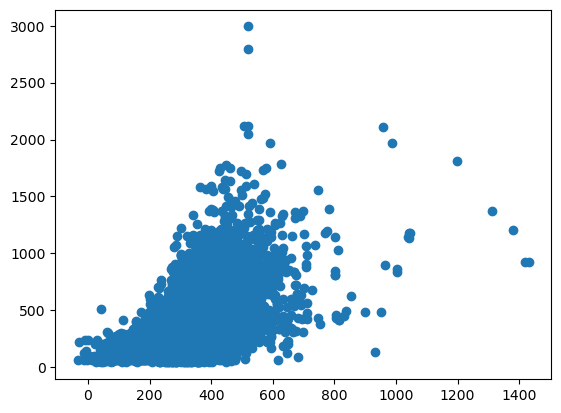

In [77]:
plt.scatter(y_train_pred, y_train)

<h1> Model 6 - Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor

In [35]:
X = auto_df_sub.drop(columns=['Premium'])
y = auto_df_sub['Premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

rf = RandomForestRegressor(random_state=47, n_estimators=500)

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)

<h3> Error metrics with n_estimators set to 500

In [36]:
#Training error metrics with n_estimators set to 500
mse = mean_squared_error(y_train, y_pred_train)
print(r2_score(y_train, y_pred_train))
print(np.sqrt(mse))
print(mse)

0.9426578710499103
32.856199835513834
1079.5298676312193


In [37]:
#Testing error metrics with n_estimators set to 500
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(r2_score(y_test, y_pred))
print(np.sqrt(mse))
print(mse)

0.5677502186636261
89.9561369560713
8092.1065760594565


<h3> Error metrics with n_estimators set to 1000

In [45]:
#Training error metrics with n_estimators set to 1000
mse = mean_squared_error(y_train, y_pred_train)
print(r2_score(y_train, y_pred_train))
print(np.sqrt(mse))
print(mse)

0.9446309390472694
32.28598225918988
1042.3846504407238


In [46]:
#Testing error metrics with n_estimators set to 1000
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(r2_score(y_test, y_pred))
print(np.sqrt(mse))
print(mse)

0.5766797287926457
89.02212127280373
7924.938075909775


In [52]:
max_depth = [5, 10, 15, 20, 25]
train_r_scores = []
train_rmse_scores = []
test_r_scores = []
test_rmse_scores = []

In [53]:
X = auto_df_sub.drop(columns=['Premium'])
y = auto_df_sub['Premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

for i in max_depth:
    rf = RandomForestRegressor(random_state=47, n_estimators=500, max_depth = i)
    rf.fit(X_train, y_train)
    y_pred_train = rf.predict(X_train)
    y_pred = rf.predict(X_test)
    
    train_r_scores.append(r2_score(y_train, y_pred_train))
    train_rmse_scores.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    
    test_r_scores.append(r2_score(y_test, y_pred))
    test_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))


In [54]:
train_r_scores

[0.28766630694692474,
 0.5223695427589652,
 0.76956821180691,
 0.8971193147742353,
 0.935996384201595]

In [55]:
train_rmse_scores

[115.80362868791755,
 94.8257816283539,
 65.86453344118331,
 44.00959265752802,
 34.712243174346796]

In [56]:
test_r_scores

[0.2558817830050546,
 0.387950849413886,
 0.4955413344717038,
 0.5533503451397093,
 0.5710854354448984]

In [57]:
test_rmse_scores

[118.02781688986762,
 107.04257691196503,
 97.1798443653361,
 91.44225075479335,
 89.60841647707532]

In [58]:
#It is very clear that increasing the depth leads to greater accuracy with both the training and test scores
#however, running with 25 as the max depth essentially matches running it with "None", so that is the hyperparameter
#I will use, along with 1000 n_estimators

<h1> Final Model - Random Forest Regressor

In [65]:
rf = RandomForestRegressor(random_state=20, n_estimators=1000, max_depth = 25)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)


print(r2_score(y_train, y_pred_train))
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))

print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.9353140472721815
35.157668208542965
0.5957448193099035
85.0023260790051


Text(0, 0.5, 'Actual Prices')

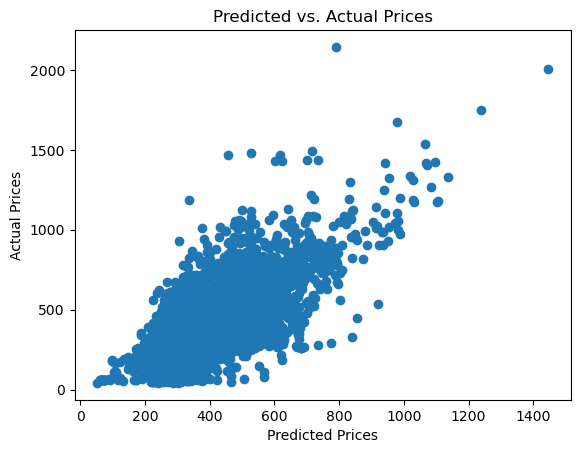

In [66]:
plt.scatter(y_pred, y_test)
plt.title('Predicted vs. Actual Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')

<h1> Model 6.5 Grid Search with Random Forest Regressor

In [156]:
#Run Grid Search with Random Forest Regressor to understand best parameters and hyperparameters.
#Takes a very long time to run.  Will likely try to Randomly select as well.

X = auto_df_sub.drop(columns=['Premium'])
y = auto_df_sub['Premium']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

param_grid = {'n_estimators' : [100, 200, 300, 500, 1000],
              'max_depth' : [5, 10, 15, 20, 25, 30, None]}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(rf_model, param_grid, cv=5)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, None],
                         'n_estimators': [100, 200, 300, 500, 1000]})

In [158]:
best_rf = grid_search.best_estimator_

feature_importances = best_rf.feature_importances_


importance_df = pd.DataFrame({
    'Feature' : X.columns,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
17,Value_vehicle,0.154670
14,Year_matriculation,0.128611
22,Age,0.121584
0,ID,0.085314
11,R_Claims_history,0.061122
21,Weight,0.054609
20,Length,0.053521
15,Power,0.048825
16,Cylinder_capacity,0.047924
2,Seniority,0.042417


In [165]:
#Although the best parameters indicate no max_depth and large estimator, I will need to play around with the
#hyperparameters to try and find a good bias-variance trade off without overfitting the model.
#submitting this now but will conitnue to work on this model.

<h1> Model 7 - Gradient Boost
   

In [62]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=189, learning_rate=.07829, random_state = 42, max_depth=9, subsample=.88766)
gbr.fit(X_train, y_train)


y_pred_train = gbr.predict(X_train)
y_pred = gbr.predict(X_test)


print(r2_score(y_train, y_pred_train))
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))

print(r2_score(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.8175400284358157
59.04714110889962
0.5421306845842188
90.46358261918475


In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [60]:
model = GradientBoostingRegressor(random_state=50)

param_distributions = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 20),
    'subsample': uniform(0.5, 0.9)
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions, n_iter=100, cv=5)
random_search.fit(X_train, y_train)

/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
205 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/matthewelmajian/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    valida

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=50),
                   n_iter=100,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x30ff8a810>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30ff8a4d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30ff0b250>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x30a5a2550>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x30c88f1d0>})

In [61]:
print(random_search.best_params_)

{'learning_rate': 0.07829151189898244, 'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 189, 'subsample': 0.8876605723566228}
